# Making USDA Crop Data Maps with R!
(based on Zachary Stansell's tweet: https://twitter.com/ZacharyStansell/status/1354612264679198722)

#### References:
* [USDA NASS Census of Agriculture Intro](https://www.nass.usda.gov/Publications/AgCensus/2017/Full_Report/Volume_1,_Chapter_1_US/usintro.pdf)
* [USDA NASS QuickStats API](https://quickstats.nass.usda.gov/api)
* https://github.com/ropensci/rnassqs 
* https://cran.r-project.org/web/packages/usdarnass/vignettes/usdarnass.html
* https://www.r-bloggers.com/2019/11/rnassqs-accessing-usda-agricultural-data-via-api/
* https://sheilasaia.rbind.io/post/2020-06-30-nass-api-part2/

#### First, do some set up

In [ ]:
# Install packages if needed
#install.packages("png")
#install.packages("rnassqs") # R NASS Quick Stats
#install.packages("tidyverse")
#install.packages("socviz")
#install.packages("classInt")
#install.packages("showtext")

In [1]:
library("devtools")
library("png")
library("rnassqs")
library("tidyverse")
library("socviz")
library("classInt")
library("showtext")

Warning message:
"package 'devtools' was built under R version 3.6.3"Loading required package: usethis
Warning message:
"package 'usethis' was built under R version 3.6.3"Warning message:
"package 'rnassqs' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.5     v dplyr   1.0.3
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"-- Conflicts --------------------------------------------------------------------------------

In [2]:
# Add additional fonts if you want
#install.packages("extrafont")
library("extrafont")
#font_import(pattern="Roboto") # to use the Roboto font, first manually install it: https://fonts.google.com/specimen/Roboto
font_import()
loadfonts(device="win")
#windowsFonts()
#fonts()
#fonttable()[130:150,]

Warning message:
"package 'extrafont' was built under R version 3.6.2"Registering fonts with R

Attaching package: 'extrafont'

The following object is masked from 'package:showtextdb':

    font_install



Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


Scanning ttf files in C:\windows\Fonts ...
Extracting .afm files from .ttf files...
C:\Windows\Fonts\AGENCYB.TTF : AgencyFB-Bold already registered in fonts database. Skipping.
C:\Windows\Fonts\AGENCYR.TTF : AgencyFB-Reg already registered in fonts database. Skipping.
C:\Windows\Fonts\ALGER.TTF : Algerian already registered in fonts database. Skipping.
C:\Windows\Fonts\ANTQUAB.TTF : BookAntiqua-Bold already registered in fonts database. Skipping.
C:\Windows\Fonts\ANTQUABI.TTF : BookAntiqua-BoldItalic already registered in fonts database. Skipping.
C:\Windows\Fonts\ANTQUAI.TTF : BookAntiqua-Italic already registered in fonts database. Skipping.
C:\Windows\Fonts\arial.ttf : ArialMT already registered in fonts database. Skipping.
C:\Windows\Fonts\arialbd.ttf : Arial-BoldMT already registered in fonts database. Skipping.
C:\Windows\Fonts\arialbi.ttf : Arial-BoldItalicMT already registered in fonts database. Skipping.
C:\Windows\Fonts\ariali.ttf : Arial-ItalicMT already registered in fonts 

### Getting started with the R NASS Package
##### Example of calling data using the USDA NASS API
params <- list(commodity_desc = "CORN", year__GE = 2012, state_alpha = "VA")\
d <- nassqs(params)\
##### Requires an API key which can be requested here: https://quickstats.nass.usda.gov/api

In [3]:
get_key <- function(key_name) {
    df <- read.csv(file = 'accts.csv')
    key <- as.character(df[(df$KEYNAME == 'NASS API KEY')]$KEY)
    return(key)
}

In [4]:
api_key <- get_key("NASS API KEY")
nassqs_auth(key = api_key)

### Set parameters for the data query and maps

In [5]:
# Set batch parameters
breaks = 7
height = 8
year_start = 2012
year_end = 2017
file = "CropsList.csv"

In [6]:
# Read in list of crops from csv
cropscsv = read.csv(file)
crops = as.character(cropscsv[['Commodity']])
crops

[1] "ALMONDS"                                     
  [2] "APPLES"                                      
  [3] "APRICOTS"                                    
  [4] "AQUATIC PLANTS"                              
  [5] "ARONIA BERRIES"                              
  [6] "ARTICHOKES"                                  
  [7] "ASPARAGUS"                                   
  [8] "AVOCADOS"                                    
  [9] "BANANAS"                                     
 [10] "BARLEY"                                      
 [11] "BEANS"                                       
 [12] "BEDDING PLANT TOTALS"                        
 [13] "BEETS"                                       
 [14] "BERRIES, OTHER"                              
 [15] "BERRY TOTALS"                                
 [16] "BLACKBERRIES"                                
 [17] "BLUEBERRIES"                                 
 [18] "BOYSENBERRIES"                               
 [19] "BROCCOLI"                                    
 [20] "BRUSSELS SPROUTS"                            
 [21] "BUCKWHEAT"                                   
 [22] "BULBS & CORMS & RHIZOMES & TUBERS"           
 [23] "CABBAGE"                                     
 [24] "CAMELINA"                                    
 [25] "CANOLA"                                      
 [26] "CARROTS"                                     
 [27] "CAULIFLOWER"                                 
 [28] "CELERY"                                      
 [29] "CHERIMOYAS"                                  
 [30] "CHERRIES"                                    
 [31] "CHESTNUTS"                                   
 [32] "CHICKPEAS"                                   
 [33] "CHICORY"                                     
 [34] "CITRUS TOTALS"                               
 [35] "CITRUS, OTHER"                               
 [36] "COFFEE"                                      
 [37] "CORN"                                        
 [38] "COTTON"                                      
 [39] "CRANBERRIES"                                 
 [40] "CROP TOTALS"                                 
 [41] "CROPS, OTHER"                                
 [42] "CUCUMBERS"                                   
 [43] "CURRANTS"                                    
 [44] "CUT CHRISTMAS TREES"                         
 [45] "CUT CHRISTMAS TREES & SHORT TERM WOODY CROPS"
 [46] "CUT FLOWERS & CUT CULTIVATED GREENS"         
 [47] "DAIKON"                                      
 [48] "DATES"                                       
 [49] "DILL"                                        
 [50] "EGGPLANT"                                    
 [51] "ELDERBERRIES"                                
 [52] "EMMER & SPELT"                               
 [53] "ESCAROLE & ENDIVE"                           
 [54] "FIELD CROPS, OTHER"                          
 [55] "FIGS"                                        
 [56] "FLAXSEED"                                    
 [57] "FLORICULTURE TOTALS"                         
 [58] "FLORICULTURE, OTHER"                         
 [59] "FLOWER SEEDS"                                
 [60] "FLOWERING PLANTS, POTTED"                    
 [61] "FOLIAGE PLANTS"                              
 [62] "FRUIT & TREE NUT TOTALS"                     
 [63] "FRUIT TOTALS"                                
 [64] "GARLIC"                                      
 [65] "GINGER ROOT"                                 
 [66] "GINSENG"                                     
 [67] "GRAIN"                                       
 [68] "GRAPEFRUIT"                                  
 [69] "GRAPES"                                      
 [70] "GRASSES"                                     
 [71] "GRASSES & LEGUMES TOTALS"                    
 [72] "GRASSES & LEGUMES, OTHER"                    
 [73] "GREENS"                                      
 [74] "GUAR"                                        
 [75] "GUAVAS"                                      
 [76] "HAY"                

In [7]:
# Pick a crop based on the numbered list above
cropnum = 160 # e.g., inputting 6 will map ARTICHOKES
crops[[cropnum]] # this is the crop you'll be mapping

[1] "TOBACCO"

### Query the USDA NASS API

In [8]:
# set parameters
params <- list(
    commodity_desc = crops[[cropnum]],
    domaincat_desc = "NOT SPECIFIED",
    agg_level_desc = "county",
    #state_alpha = "MO",
    year = year_start:year_end
)

In [9]:
# Count records that will be returned by query (api won't provide > 50K)
rec.count <- nassqs_record_count(params)
rec.count

  |======================================================================| 100%


$count
[1] 7273

In [10]:
# Query API for crop acreage
if (rec.count < 49999) {
    dat1 <- nassqs_acres(params) %>%
    # filter out withheld data (see first link in References)
    # may want to modify how this is handled since withheld data != 0
    mutate(Value = na_if(Value, "                 (Z)")) %>%
    mutate(Value = na_if(Value, "                 (D)")) %>%
    # trim whitespace
    mutate(Value = as.numeric(gsub(",", "", Value)))  %>%
    # create county level fips code
    mutate(id = paste(state_fips_code, county_code, sep = "")) 
} else {
    # glue together multiple years if dataset is too big
    data_list <- lapply(year_start:year_end, function(yr) {
        params[['year']] <- yr
        tryCatch(
            nassqs_acres(params),
            error = function(e)
                NULL
        )
    })
    # same munging as above, but with rbind
    # again, may want to modify how this is handled since withheld data != 0
    dat1 <- bind_rows(data_list) %>%
        mutate(Value = na_if(Value, "                 (Z)")) %>%
        mutate(Value = na_if(Value, "                 (D)")) %>%
        mutate(Value = as.numeric(gsub(",", "", Value)))  %>%
        mutate(id = paste(state_fips_code, county_code, sep = ""))
}

  |======================================================================| 100%


In [11]:
head(dat1)

congr_district_code,CV (%),asd_desc,location_desc,domain_desc,class_desc,sector_desc,commodity_desc,state_fips_code,statisticcat_desc,...,unit_desc,watershed_code,short_desc,source_desc,reference_period_desc,state_alpha,county_name,state_name,year,id
,(D),BLACK BELT,"ALABAMA, BLACK BELT, ELMORE",TOTAL,ALL CLASSES,CROPS,TOBACCO,01,AREA HARVESTED,...,ACRES,00000000,TOBACCO - ACRES HARVESTED,CENSUS,YEAR,AL,ELMORE,ALABAMA,2012,01051
,(D),ALL COUNTIES,"CONNECTICUT, ALL COUNTIES, FAIRFIELD",TOTAL,ALL CLASSES,CROPS,TOBACCO,09,AREA HARVESTED,...,ACRES,00000000,TOBACCO - ACRES HARVESTED,CENSUS,YEAR,CT,FAIRFIELD,CONNECTICUT,2012,09001
,52.4,ALL COUNTIES,"CONNECTICUT, ALL COUNTIES, HARTFORD",TOTAL,ALL CLASSES,CROPS,TOBACCO,09,AREA HARVESTED,...,ACRES,00000000,TOBACCO - ACRES HARVESTED,CENSUS,YEAR,CT,HARTFORD,CONNECTICUT,2017,09003
,2.7,ALL COUNTIES,"CONNECTICUT, ALL COUNTIES, HARTFORD",TOTAL,ALL CLASSES,CROPS,TOBACCO,09,AREA HARVESTED,...,ACRES,00000000,TOBACCO - ACRES HARVESTED,CENSUS,YEAR,CT,HARTFORD,CONNECTICUT,2012,09003
,(D),ALL COUNTIES,"CONNECTICUT, ALL COUNTIES, NEW LONDON",TOTAL,ALL CLASSES,CROPS,TOBACCO,09,AREA HARVESTED,...,ACRES,00000000,TOBACCO - ACRES HARVESTED,CENSUS,YEAR,CT,NEW LONDON,CONNECTICUT,2012,09011
,52.4,ALL COUNTIES,"CONNECTICUT, ALL COUNTIES, TOLLAND",TOTAL,ALL CLASSES,CROPS,TOBACCO,09,AREA HARVESTED,...,ACRES,00000000,TOBACCO - ACRES HARVESTED,CENSUS,YEAR,CT,TOLLAND,CONNECTICUT,2017,09013


### Clean and Process Data

In [12]:
# average across years
dat2 <- dat1 %>%
    group_by(id) %>%
    summarize(Value = mean(Value, na.rm = TRUE)) %>%
    mutate(Value = replace_na(Value, 0))
#head(dat2)

In [13]:
# select chart type
chart_type = 2 # can be 1 or 2, see below. can add more!

In [14]:
# process based on selected chart type

# CHART 1: Mean Acres Harvested (not normalized by county size)
if (chart_type == 1) {
chartlabel = "mean acres harvested,"
filelabel = "_acres"
# join data with county map
dat3 <- left_join(county_map, dat2, by = "id") %>%
        mutate(Value = replace_na(Value, 0))
}

# CHART 2: Mean Acres Harvested Per 1000 County Acres (normalized)
if (chart_type == 2) {
    chartlabel = "mean acres harvested per 1000 county acres,"
    filelabel = "_acres_normalized"
    county_full <- left_join(county_map, county_data, by = "id")
    dat3 <- left_join(county_full, dat2, by = "id") %>%
        mutate(Value = replace_na(Value, 0)) %>%
        mutate(land_area_ac = land_area * 640) %>%
        mutate(Value = (Value/land_area_ac)*1000) # now the unit is selected crop acres per 1000 county acres
}

In [15]:
# set the number of breaks (kmeans in this case)
BREAKS.SPLIT <-
ifelse(rec.count$count > 1250,
       breaks, # sets number of breaks based on user-input parameter if records > 1250
       ifelse(rec.count$count > 50, 5, 3)) # defaults to 5 breaks if 50 < records <1250, 3 breaks if records < 50

breaks_qt <-
    classIntervals(var = dat3$Value,
    n = BREAKS.SPLIT,
    style = "kmeans")

# hacky attempt to fix the classInt issue where it will drop levels esp w/ small data
ifelse(BREAKS.SPLIT == length(breaks_qt$brks),
       BREAKS.SPLIT <- BREAKS.SPLIT,
       BREAKS.SPLIT <- length(breaks_qt$brks) - 1)

# check results
breaks_qt

[1] 7

style: kmeans
       [0,0.5316018) [0.5316018,1.867959)  [1.867959,3.706781) 
              180217                 5265                 1997 
 [3.706781,6.199583)  [6.199583,10.27932)  [10.27932,20.16832) 
                1614                 1280                  793 
  [20.16832,34.4539] 
                 216 

In [16]:
# rounding function for breaks
rounding <- unlist(lapply(breaks_qt$brks, function (x) {
    signif(x, 3)
}))

# configure breaks into human readable lines
plot.breaks <-
    c(0, rounding[2:(BREAKS.SPLIT-1) ],
        paste(rounding[BREAKS.SPLIT],
                    "-",
                    rounding[BREAKS.SPLIT + 1], sep = ""))

In [17]:
# chop data up by breaks
dat4 <-
    mutate(
        dat3,
        Value = cut(
            Value,
            right = FALSE,
            breaks_qt$brks,
            include.lowest = TRUE,
            dig.lab = 2
        )
    )

### Set Map Theme and Create Crop Map

In [18]:
### r theme map
# https://socviz.co/appendix.html#appendix
# modified from the delightful website https://socviz.co/maps.html
theme_map <- function(base_size = 9,
                      base_family = "") {
    require(grid)
    theme_bw(base_size = base_size, base_family = base_family) %+replace%
        theme(
            axis.line = element_blank(),
            axis.text = element_blank(),
            axis.ticks = element_blank(),
            axis.title = element_blank(),
            panel.background = element_blank(),
            panel.border = element_blank(),
            panel.grid = element_blank(),
            panel.spacing = unit(0, "lines"),
            plot.background = element_rect(fill = "black"),
            #plot.margin=grid::unit(c(0,0,0,0), "mm"),
            legend.justification = c(0, 0),
            legend.text = element_text(color = "white",size=10,family="Roboto"),
            legend.position = c(0, 0.94),
            legend.key.size = unit(10,"pt"),
            #legend.position = c(-0.005, 0.94),
            strip.background = element_rect(fill = "black"),
            legend.background = element_rect(fill = "black"),
            plot.title = element_text(
                color = "white",
                hjust = 0,
                vjust = -0,
                size = 22,
                face = "bold",
                family="Roboto"
            ),
            plot.subtitle = element_text(
                color = "white",
                hjust = 0,
                vjust = -1.05,
                size = 10,
                #face = "bold",
                family="Roboto"
            ) 
        )
}

Loading required package: grid


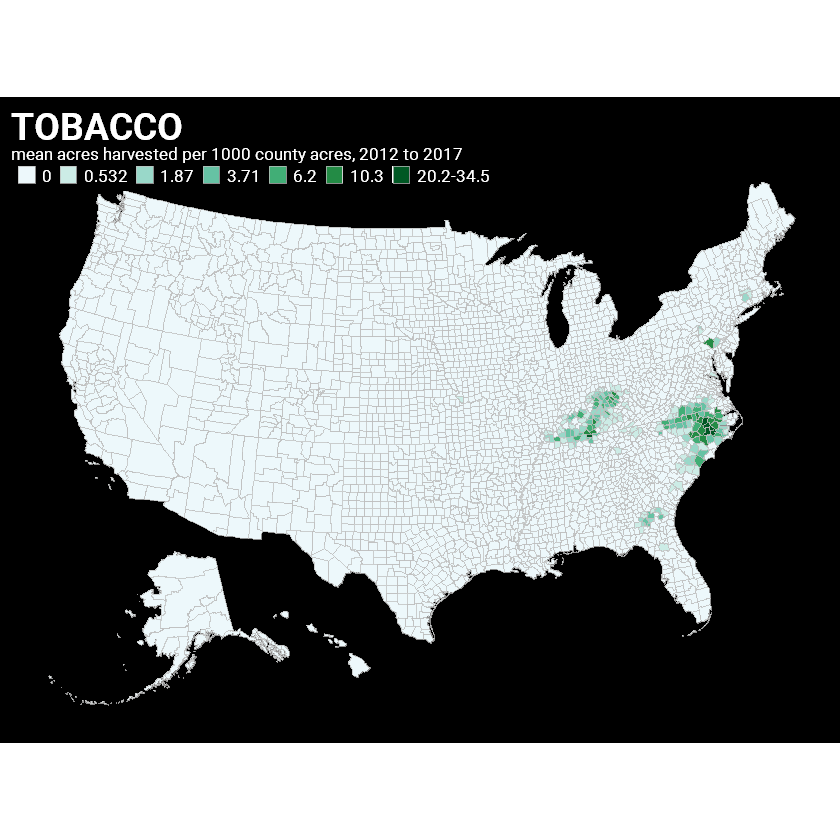

In [19]:
# make a plot of your selected crop (cropnum)
ggplot(
    data = dat4,
    mapping = aes(
        x = long,
        y = lat,
        fill = Value,
        group = group
    )
)  +
    # county lines
    geom_polygon(color = alpha("gray", 0.75), size = 0.02) +
    coord_equal() +
    # set color according to spreadsheet
    scale_fill_brewer(palette = 2,
                      labels = plot.breaks) +
    labs(
        title = paste(crops[[cropnum]]),
        subtitle = paste(chartlabel, year_start, "to", year_end)
    ) +
    # map theme from
    theme_map() +
    guides(fill = guide_legend(nrow = 1))

In [20]:
# save plot
ggsave(
    plot = last_plot(),
    file = paste(crops[[cropnum]], filelabel, ".png", sep = ""),
    height = height,
    width = height * 1.3355,
    units = "in",
    dpi = "retina"
)